# TASK 1: TITANIC SURVIVAL PREDICTION

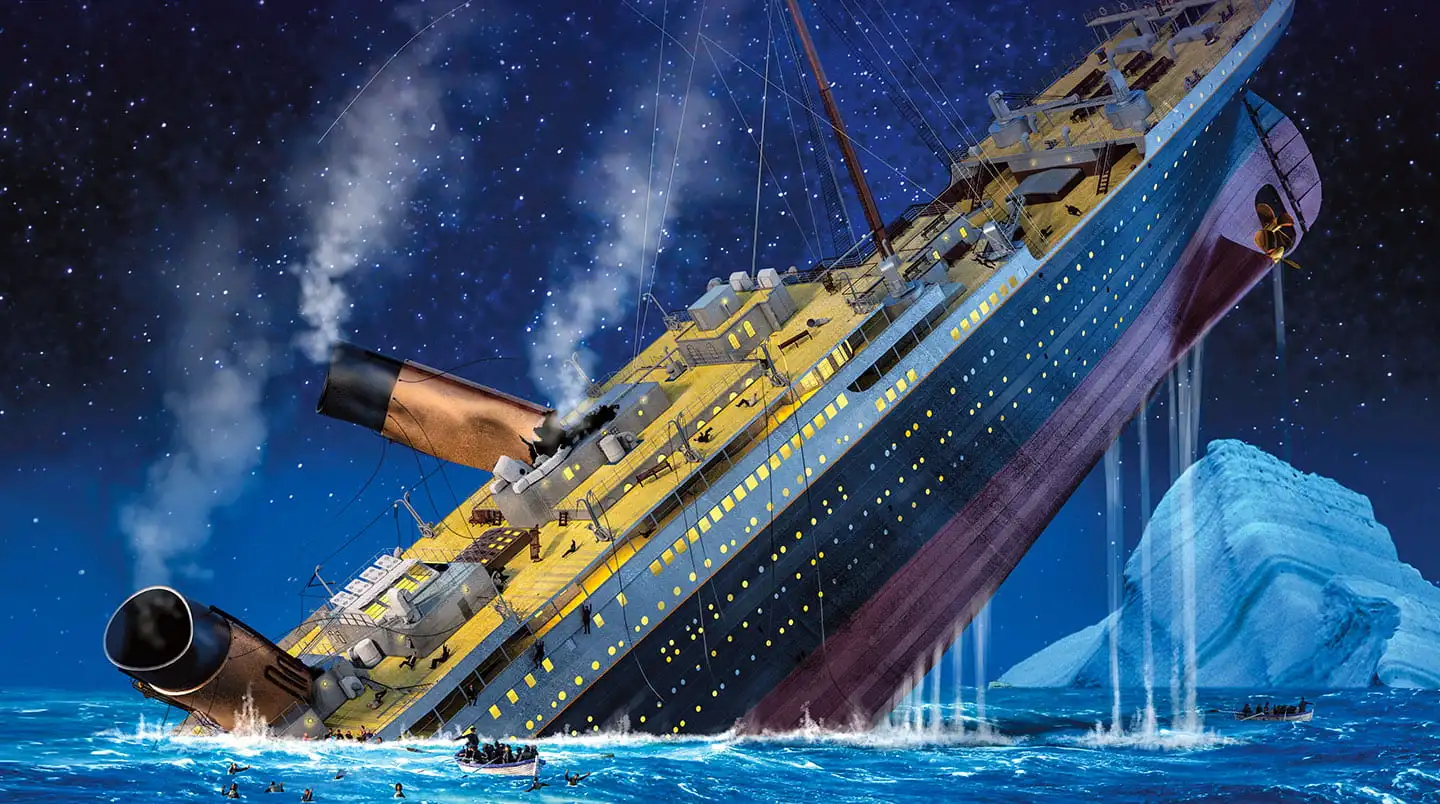

## Task Description:

- Use the Titanic dataset to build a model that predicts whether a passenger on Titanic survived or not. This is a classic beginner project with readily available data.
- The dataset typically used for this project contains nformation about individual passengers such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

## About the Dataset:

The Titanic Dataset [link](https://www.kaggle.com/datasets/brendan45774/test-file) is a dataset curated on the basis of the passengers on titanic, like their age, class, gender, etc to predict if they would have survived or not. It contains both numerical and string values. It has 12 predefined columns which are as below:
- Passenger ID - To identify unique passengers
- Survived - If they survived or not
- PClass - The class passengers travelled in
- Name - Passenger Name
- Sex - Gender of Passenger
- Age - Age of passenger
- SibSp - Number of siblings or spouse
- Parch - Parent or child
- Ticket - Ticket number
- Fare - Amount paid for the ticket
- Cabin - Cabin of residence
- Embarked - Point of embarkment

In [1]:
# Importing all the necessary libraries

# Data Manipulation
import pandas as pd
import numpy as np
from scipy.stats import f_oneway, chi2_contingency

# Data Viz
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns


# ML Models
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score
from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# filter warnings
import warnings 
warnings.filterwarnings('ignore')

## Exploratory Data Analysis (EDA)

In [3]:
titanic_data = pd.read_csv('C:/Users/sanja/OneDrive/Desktop/CODSOFT/TASK 1_ Titanic Dataset Survival Prediction/Titanic_Dataset_Survival_Prediction.csv')

In [4]:
# Function to check number of rows and columns of dataset, number of missing values in each column,
# glimpse of the dataframe, statistical and important information about the dataset 

def analysis(data):
    print(f'Titanic Data Size  : {data.size}')
    print(f'\nShape of the dataframe: {data.shape[0]} rows and {data.shape[1]} columns')
    print("*" * 100)
    print(f'\nMissing values in each column: \n{data.isnull().sum()} ')
    print(f'\nTotal missing values in the dataframe: {data.isnull().sum().sum()} ')
    print("*" * 100)
    print("\nGlimpse of the dataframe:")
    display(data.head())
    print("*" * 100)
    print("\nStatistical measures about the data:")
    display(data.describe())
    print("*" * 100)
    print("\nSome important information about the dataframe:\n")
    display(data.info())
    print("*" * 110)
    
data = titanic_data
analysis(titanic_data)

Titanic Data Size  : 5434

Shape of the dataframe: 418 rows and 13 columns
****************************************************************************************************

Missing values in each column: 
Unnamed: 0                     0
PassengerId                    0
Pclass                         0
Name                           0
Sex                            0
Age                            0
SibSp                          0
Parch                          0
Ticket                         0
Fare                           0
Embarked                       0
Survived                       0
Titanic_Survived_Prediction    0
dtype: int64 

Total missing values in the dataframe: 0 
****************************************************************************************************

Glimpse of the dataframe:


,Unnamed: 0,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,Titanic_Survived_Prediction
0,0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,0
1,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1,1
2,2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,0
3,3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,0
4,4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1,1


****************************************************************************************************

Statistical measures about the data:


,Unnamed: 0,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived,Titanic_Survived_Prediction
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,208.500000,1100.500000,2.265550,29.599282,0.447368,0.392344,35.627188,0.363636,0.361244
std,120.810458,120.810458,0.841838,12.703770,0.896760,0.981429,55.840500,0.481622,0.480937
min,0.000000,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,104.250000,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,208.500000,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000,0.000000
75%,312.750000,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000,1.000000,1.000000
max,417.000000,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,1.000000,1.000000


****************************************************************************************************

Some important information about the dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   418 non-null    int64  
 1   PassengerId                  418 non-null    int64  
 2   Pclass                       418 non-null    int64  
 3   Name                         418 non-null    object 
 4   Sex                          418 non-null    object 
 5   Age                          418 non-null    float64
 6   SibSp                        418 non-null    int64  
 7   Parch                        418 non-null    int64  
 8   Ticket                       418 non-null    object 
 9   Fare                         418 non-null    float64
 10  Embarked                     418 non-null  

None

**************************************************************************************************************


## Finding the Missing values

In [5]:
#Checking missing values and its percentage in the dataframe
def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(titanic_data)

,Missing_Number,Missing_Percent
Unnamed: 0,0,0.0
PassengerId,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0


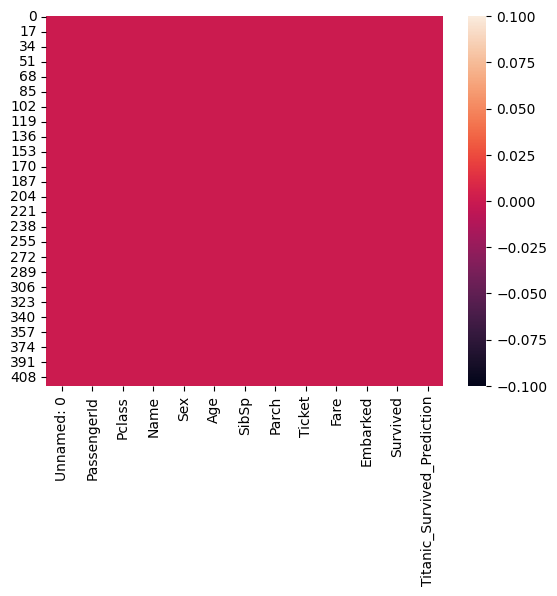

In [6]:
#Visualization of missing values
sns.heatmap(titanic_data.isnull());

- Cabin column will be discarded from the dataframe due to the high number of missing values.
- Null values in Age column will be handled by imputing its mean value 
- Null value in Fare column will be handled by imputing its mode value 

## Handling the Missing values

In [7]:
# drop the "Cabin" column from the dataframe
titanic_data = titanic_data.drop(columns='Cabin', axis=1)

KeyError: "['Cabin'] not found in axis"

In [ ]:
# replacing the missing values in "Age" column with mean value
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)

In [ ]:
# finding the mode value of "Fare" column
print(titanic_data['Fare'].mean())

35.627188489208635


In [ ]:
# replacing the missing values in "Fare" column with mode value
titanic_data['Fare'].fillna(titanic_data['Fare'].mean(), inplace=True)

In [ ]:
# check the number of missing values in each column
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Data Visualization

In [8]:
# Selecting only required columns
df = titanic_data[['Survived','Pclass','Sex','Age','SibSp', 'Parch','Fare','Embarked']]

In [9]:
#head of the dataframe
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [10]:
# Distribution of Survival Bar plot 

fig = go.Figure()

fig.add_trace(go.Bar(
    x=df['Survived'].value_counts().index,
    y=df['Survived'].value_counts(),
    marker_color=['Red','Green'],marker_line=dict(width=0.5, color='black'),
    text=df['Survived'].value_counts(),
    textfont=dict(size=14,color="black"),textposition='outside',
    hovertemplate='<b>%{x}</b><br>Count: %{y}<br>',
))

fig.update_xaxes(type='category', tickvals=[0, 1], ticktext=['<b>Not Survived</b>', '<b>Survived</b>'], tickfont_size=14, color ='black')
fig.update_yaxes(tickfont_size=14)
                 
fig.update_layout(
    title='<b>Distribution of Survival</b>',title_font_family="Times New Roman",title_font=dict(size=30),title_font_color="black",
    xaxis=dict(title='<b>Survival</b>',title_font=dict(size=19)),
    yaxis=dict(title='<b>Count</b>',title_font=dict(size=19), color='black'),
    title_x=0.5,
)

fig.show() 

From the above visualization, we can clearly see that, out of 418 passengers, 152 passengers have survived from the titanic crash and 266 passengers have not survived from the crash.

**Note:** GitHub does not render interactive graphs. View the dynamic visualization by running the code locally for full interactivity or please try loading this page with nbviewer.org.


In [11]:
# Distribution for survival distribution by Sex
fig = go.Figure()

fig.add_trace(go.Bar(
    x=df.groupby(['Sex', 'Survived']).size().unstack().index,
    y=df.groupby(['Sex', 'Survived']).size().unstack()[1],  
    text=df.groupby(['Sex', 'Survived']).size().unstack()[1],
    textposition='outside',
    textfont=dict(size=14,color="black"),
    hovertemplate='<b>%{x}</b><br>Count: %{y}<br>Survived',
    name='Survived',
    marker_color='hotpink', marker_line=dict(width=1, color='black'),
))

fig.add_trace(go.Bar(
    x=df.groupby(['Sex', 'Survived']).size().unstack().index,
    y=df.groupby(['Sex', 'Survived']).size().unstack()[0],  
    text=df.groupby(['Sex', 'Survived']).size().unstack()[0],
    textposition='outside',
    textfont=dict(size=14,color="black"),
    hovertemplate='<b>%{x}</b><br>Count: %{y}<br>Not Survived',
    name='Not Survived',
    marker_color='dodgerblue', marker_line=dict(width=1, color='black'),
))

fig.update_xaxes(type='category', tickvals=[0, 1], ticktext=['<b>Female</b>', '<b>Male</b>'], tickfont_size=14, color ='black')
fig.update_yaxes(tickfont_size=14)
    
fig.update_layout(
    title='<b>Distribution of Survival by Sex</b>',title_font_family="Times New Roman",title_font=dict(size=30),title_font_color="black",
    xaxis=dict(title='<b>Survival</b>', title_font=dict(size=18)),
    yaxis=dict(title='<b>Count</b>', title_font=dict(size=18),color='black'),
    title_x=0.5,
    barmode='group',  
  
    legend=dict(title='<b>Category</b>', x=0.01, y=1, title_font_family="Times New Roman", font=dict(family="Courier",
            size=13, color="black"), bgcolor="LightSteelBlue", bordercolor="Black", borderwidth=1)
)

fig.show()

From the above visualization, we can clearly see that, all the female passengers survived and all the male passengers not survived.

**Note:** GitHub does not render interactive graphs. View the dynamic visualization by running the code locally for full interactivity or please try loading this page with nbviewer.org.

In [12]:
# Distribution for Survival by Passenger Class
fig = go.Figure()

class_colors = {1: '#fdca26', 2: '#fb9f3a', 3: '#ed7953'}

for pclass in [1, 2, 3]:
    filtered_df = df[df['Pclass'] == pclass]
    
    fig.add_trace(go.Bar(
        x=filtered_df['Survived'].value_counts().index.map({0: 'Not Survived', 1: 'Survived'}),
        y=filtered_df['Survived'].value_counts(),
        text=filtered_df['Survived'].value_counts(),
        textposition='outside',
        textfont=dict(size=14,color="black"),
        hovertemplate='<b>%{x}</b><br>Count: %{y}<br>',
        marker_color=class_colors[pclass], marker_line=dict(width=1, color='black'),
        name=f'Class {pclass}'
    ))

fig.update_xaxes(type='category', tickfont_size=14, color ='black')
fig.update_yaxes(tickfont_size=14)

fig.update_layout(
    title='<b>Distribution for Survival by Passenger Class</b>',title_font_family="Times New Roman",title_font=dict(size=30),title_font_color="black",
    xaxis=dict(title='<b>Survival</b>', title_font=dict(size=18)),
    yaxis=dict(title='<b>Count</b>', title_font=dict(size=18),color='black'),
    title_x=0.5,
    barmode='group',
    legend=dict(title='<b>Passenger Class</b>', x=0.9, y=1, title_font_family="Times New Roman", font=dict(family="Courier",
            size=13, color="black"), bgcolor="lightyellow", bordercolor="Black", borderwidth=2),
)

fig.show()

From the above visualization, we can clearly see that, majority passengers in the Pclass=1 survived and majority passengers from the Pclass=3 not survived

**Note:** GitHub does not render interactive graphs. View the dynamic visualization by running the code locally for full interactivity or please try loading this page with nbviewer.org.

In [13]:
# Distribution for Survival by Embarked
fig = go.Figure()

embarked_colors = {'S': '#9c179e', 'C': '#7201a8', 'Q': '#0d0887'}
embarked_labels = {'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}

for embarked in ['S', 'C', 'Q']:
    filtered_df = df[df['Embarked'] == embarked]
    
    fig.add_trace(go.Bar(
        x=filtered_df['Survived'].value_counts().index.map({0: 'Not Survived', 1: 'Survived'}),
        y=filtered_df['Survived'].value_counts(),
        text=filtered_df['Survived'].value_counts(),
        textposition='outside',
        textfont=dict(size=14,color="black"),
        hovertemplate='<b>%{x}</b><br>Count: %{y}<br>',
        marker_color=embarked_colors[embarked], marker_line=dict(width=1, color='black'),
        name=f'{embarked_labels[embarked]}'
    ))

fig.update_xaxes(type='category', tickvals=[0, 1], ticktext=['<b>Not Survived</b>', '<b>Survived</b>'], tickfont_size=14, color ='black')
fig.update_yaxes(tickfont_size=14)

fig.update_layout(
    title='<b>Distribution for Survival by Port of Embarkation</b>',title_font_family="Times New Roman",title_font=dict(size=30),title_font_color="black",
    xaxis=dict(title='<b>Survival</b>', title_font=dict(size=18)),
    yaxis=dict(title='<b>Count</b>', title_font=dict(size=18), color='black'),
    title_x=0.5,
    barmode='group',
    legend=dict(title='<b>Port of Embarkation</b>', x=0.9, y=1, title_font_family="Times New Roman", font=dict(family="Courier",
            size=13, color="black"), bgcolor="mintcream", bordercolor="Black", borderwidth=2),
)

fig.show()


From the above visualization, we can clearly see that, majority passengers in the Embarkment port-Queenstown had survived and majority passengers from the Embarkment port-Southampton not survived

**Note:** GitHub does not render interactive graphs. View the dynamic visualization by running the code locally for full interactivity or please try loading this page with nbviewer.org.

## Data Preprocessing

In [14]:
num_list = df.select_dtypes(include='number').columns.tolist()
obj_list = df.select_dtypes(include='object').columns.tolist()
print(f'\nNumerical columns in the dataframe: {num_list}')
print(f'\nObject columns in the dataframe: {obj_list}')


Numerical columns in the dataframe: ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Object columns in the dataframe: ['Sex', 'Embarked']


In [15]:
# Displaying the number of unique values for each numerical columns
for i in num_list:
    print("No. of unique values in %s column are: %s" % (i, df[i].nunique()))

No. of unique values in Survived column are: 2
No. of unique values in Pclass column are: 3
No. of unique values in Age column are: 79
No. of unique values in SibSp column are: 7
No. of unique values in Parch column are: 8
No. of unique values in Fare column are: 170


In [16]:
# Displaying the number of unique values for each categorical columns
for i in obj_list:
    print("No. of unique values in %s column are: %s" % (i, df[i].nunique()))

No. of unique values in Sex column are: 2
No. of unique values in Embarked column are: 3


In [17]:
# Displaying the unique values in each column
cat_col=[]
print("Unique values in each column are - ")
print()
for col in df.columns:
    if df[col].nunique()<=10:
        print(f'{col}: {df[col].unique()}')
        cat_col.append(col)

Unique values in each column are - 

Survived: [0 1]
Pclass: [3 2 1]
Sex: ['male' 'female']
SibSp: [0 1 2 3 4 5 8]
Parch: [0 1 3 2 4 6 5 9]
Embarked: ['Q' 'S' 'C']


### Preprocessing: Encoding categorical data

In [18]:
#first few records of data
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [19]:
# Selecting required columns for model training
df = df[['Survived','Pclass','Age','SibSp','Parch','Fare','Sex','Embarked']]
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked
0,0,3,34.5,0,0,7.8292,male,Q
1,1,3,47.0,1,0,7.0000,female,S
2,0,2,62.0,0,0,9.6875,male,Q
3,0,3,27.0,0,0,8.6625,male,S
4,1,3,22.0,1,1,12.2875,female,S


In [20]:
# Encode categorical variables - Sex and Embarked
df['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [21]:
df['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [22]:
# Convert categorical variables to numerical using one-hot encoding
print(df)
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)
print('\nTitanic dataset after converting all values to numerical ones: \n',df)

     Survived  Pclass   Age  SibSp  Parch      Fare     Sex Embarked
0           0       3  34.5      0      0    7.8292    male        Q
1           1       3  47.0      1      0    7.0000  female        S
2           0       2  62.0      0      0    9.6875    male        Q
3           0       3  27.0      0      0    8.6625    male        S
4           1       3  22.0      1      1   12.2875  female        S
..        ...     ...   ...    ...    ...       ...     ...      ...
413         0       3  27.0      0      0    8.0500    male        S
414         1       1  39.0      0      0  108.9000  female        C
415         0       3  38.5      0      0    7.2500    male        S
416         0       3  27.0      0      0    8.0500    male        S
417         0       3  27.0      1      1   22.3583    male        C

[418 rows x 8 columns]

Titanic dataset after converting all values to numerical ones: 
      Survived  Pclass   Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
0    

In [23]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
print(' \nTitanic dataset after standarizing the data: \n' , df)

 
Titanic dataset after standarizing the data: 
      Survived  Pclass       Age  SibSp  Parch      Fare  Sex_male  Embarked_Q  \
0           0       3  0.386231      0      0 -0.498407      True        True   
1           1       3  1.371370      1      0 -0.513274     False       False   
2           0       2  2.553537      0      0 -0.465088      True        True   
3           0       3 -0.204852      0      0 -0.483466      True       False   
4           1       3 -0.598908      1      1 -0.418471     False       False   
..        ...     ...       ...    ...    ...       ...       ...         ...   
413         0       3 -0.204852      0      0 -0.494448      True       False   
414         1       1  0.740881      0      0  1.313753     False       False   
415         0       3  0.701476      0      0 -0.508792      True       False   
416         0       3 -0.204852      0      0 -0.494448      True       False   
417         0       3 -0.204852      1      1 -0.237906     

In [24]:
df['Survived'] = df['Survived'].astype(int)
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)

### Preprocessing: Correlation between the variables

In [25]:
# Compute the correlation matrix
corr_matrix = df.corr()
corr_matrix_round = corr_matrix.round(3)
# Creating the heatmap using plotly
fig = go.Figure(data=go.Heatmap(
                z=np.array(corr_matrix_round),
                x=corr_matrix.columns,
                y=corr_matrix.index,
                colorscale = 'viridis',
                texttemplate="%{z}"
                
))

fig.update_xaxes(tickfont_size=15, color ='black')
fig.update_yaxes(tickfont_size=14, color ='black')

# Customizing the heatmap layout
fig.update_layout(
    title="<b>Correlation Heatmap</b>",title_font_family="Times New Roman",title_font=dict(size=30),title_font_color="black",
    title_x=0.5, 
   )
fig.layout.height = 800
fig.layout.width = 800

# Display the heatmap
fig.show()




A correlation score closer to 1 means a high correlation. If the correlation is near about 0 then we can say that the correlation is weak.

**Note:** GitHub does not render interactive graphs. View the dynamic visualization by running the code locally for full interactivity or please try loading this page with nbviewer.org.

## Split the data into features (X) and target variable (y)

In [26]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [27]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,0,0,0,0,True,True,False
1,3,1,1,0,0,False,False,True
2,2,2,0,0,0,True,True,False
3,3,0,0,0,0,True,False,True
4,3,0,1,1,0,False,False,True


In [28]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int32

##### Now there are no variables of object datatype in our dataframe, hence we can feed it to the model and start training the model

In [29]:
# Calculate information gain for each feature

from sklearn.feature_selection import mutual_info_classif
info_gain = mutual_info_classif(X, y, discrete_features=[1, 2, 3, 4, 5, 6, 7])

In [30]:
# Display information gain for each feature

print("\nInformation Gain for Each Feature:")
print(dict(zip(X.columns, info_gain)))


Information Gain for Each Feature:
{'Pclass': 0.0, 'Age': 0.00994716191699072, 'SibSp': 0.01649944264678283, 'Parch': 0.03171933876576627, 'Fare': 0.010898487465753446, 'Sex_male': 0.6554817739013927, 'Embarked_Q': 0.006436627076935375, 'Embarked_S': 0.005555074650833547}


In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(418, 8) (334, 8) (84, 8)


## Model Training

Predicting Titanic Survival is a classic Binary Classification problem where the goal is to determine whether a passenger survived (1) or did not survive (0) based on various features.Several machine learning models can be used for this task, including Logistic regression,SVM,KNN classifier,Gaussian Naive Bayes,Ridge Classifier, etc. This is done as follows:

In [33]:
# Applying all the model together

# LogisticRegression
logistic = LogisticRegression()
lr = logistic.fit(X_train, y_train)
y_pred_lr = logistic.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# DecisionTree
dtree = DecisionTreeClassifier()
dt = dtree.fit(X_train, y_train)
y_pred_dt = dtree.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# RandomForest
rfmodel = RandomForestClassifier()
rf = rfmodel.fit(X_train, y_train)
y_pred_rf = rfmodel.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# BaggingClassifier
bagg = BaggingClassifier()
bg = bagg.fit(X_train, y_train)
y_pred_bg = bagg.predict(X_test)
accuracy_bg = accuracy_score(y_test, y_pred_bg)

# AdaBoostClassifier
ada = AdaBoostClassifier()
ad = ada.fit(X_train, y_train)
y_pred_ad = ada.predict(X_test)
accuracy_ad = accuracy_score(y_test, y_pred_ad)

# GradientBoostingClassifier
gdb = GradientBoostingClassifier()
gd = gdb.fit(X_train, y_train)
y_pred_gd = gdb.predict(X_test)
accuracy_gd = accuracy_score(y_test, y_pred_gd)

# XGBClassifier
xgb = XGBClassifier()
xg = xgb.fit(X_train, y_train)
y_pred_xg = xgb.predict(X_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)

# SVM
svc = SVC()
sv = svc.fit(X_train, y_train)
y_pred_sv = svc.predict(X_test)
accuracy_sv = accuracy_score(y_test, y_pred_sv)                   
                             
# KNN
knn = KNeighborsClassifier()
kn = knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# GaussianNB
naive_gb = GaussianNB()
ngb = naive_gb.fit(X_train, y_train)
y_pred_ngb = naive_gb.predict(X_test)
accuracy_ngb = accuracy_score(y_test, y_pred_ngb) 

# BernoulliNB
naive_bn = BernoulliNB()
nbr = naive_bn.fit(X_train, y_train)
y_pred_nbr = naive_bn.predict(X_test)
accuracy_nbr = accuracy_score(y_test, y_pred_nbr)


In [34]:
evc = VotingClassifier(estimators=[('lr',lr),('dt',dt),('rf', rf),('bg', bg),('ad',ad),
                                  ('gd', gd),('xg', xg),('sv', sv),('knn', knn),
                                  ('ngb', ngb),('nbr', nbr)], voting='hard')

model_evc = evc.fit(X_train, y_train)
pred_evc = evc.predict(X_test)
accuracy_evc = accuracy_score(y_test, pred_evc)

              Method Used  Accuracy
0      LogisticRegression  1.000000
1            DecisionTree  1.000000
2            RandomForest  1.000000
3                 Bagging  1.000000
4                Adaboost  1.000000
5        GradientBoosting  1.000000
6                 XGBoost  1.000000
7           SupportVector  0.988095
8       KNearestNeighbors  0.964286
9      NaiveBayesGaussian  1.000000
10  NaiveBayesBernoullies  1.000000
11       VotingClassifier  1.000000
Axes(0.125,0.11;0.775x0.77)


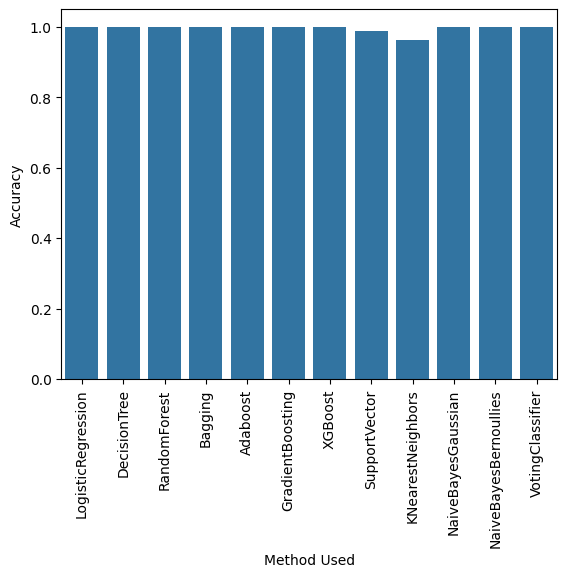

In [35]:
list1 = ['LogisticRegression','DecisionTree','RandomForest','Bagging','Adaboost',
         'GradientBoosting', 'XGBoost','SupportVector','KNearestNeighbors',
         'NaiveBayesGaussian','NaiveBayesBernoullies','VotingClassifier']

list2 = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_bg,accuracy_ad, accuracy_gd, 
         accuracy_xg, accuracy_sv, accuracy_knn, accuracy_ngb, accuracy_nbr, accuracy_evc]

list3 = [logistic, dtree, rfmodel, bagg, ada, gdb, xgb, svc, knn, naive_gb,naive_bn, evc]

final_accuracy = pd.DataFrame({'Method Used': list1, "Accuracy": list2})
print(final_accuracy)

charts = sns.barplot(x="Method Used", y = 'Accuracy', data=final_accuracy)
charts.set_xticklabels(charts.get_xticklabels(), rotation=90)
print(charts)

In [36]:
#Cross Validation for all the models
clf1 = LogisticRegression(max_iter = 15)
clf2 = DecisionTreeClassifier(criterion='entropy')
clf3 = RandomForestClassifier(n_estimators=100,criterion='entropy')
clf4 = AdaBoostClassifier()
clf5 = GradientBoostingClassifier()
clf6 = XGBClassifier()
clf7 = SVC(gamma = 'auto')
clf8 = KNeighborsClassifier()
clf9 = GaussianNB()
clf10 = BernoulliNB()

print('10-fold cross validation for all the models : \n')
for clf, label in zip([clf2, clf3, clf4, clf5, clf6, clf7, clf8, clf9, clf10, evc],['Dtree','RandomForest','AdaBoost','GradientBoost','XGBoost','SVM','KNN','Naive_Bayes_Gaussian','Naive_Bayes_Bernoulli','VotingClassifier']):
    scores = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')
    print(f'\n10-fold Cross Validation scores for {label}:', scores)
    print("Average Accuracy : %0.2f (+/-%0.2f)[%s]" % (scores.mean(), scores.std(), label))
    print("*" * 110)

10-fold cross validation for all the models : 


10-fold Cross Validation scores for Dtree: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average Accuracy : 1.00 (+/-0.00)[Dtree]
**************************************************************************************************************

10-fold Cross Validation scores for RandomForest: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average Accuracy : 1.00 (+/-0.00)[RandomForest]
**************************************************************************************************************

10-fold Cross Validation scores for AdaBoost: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average Accuracy : 1.00 (+/-0.00)[AdaBoost]
**************************************************************************************************************

10-fold Cross Validation scores for GradientBoost: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Average Accuracy : 1.00 (+/-0.00)[GradientBoost]
**************************************************************************************************************

10-

##### Deciding to go with SVM model, since it has 98% maximum accuracy

In [37]:
# Selecting SVM model 

final_result = pd.DataFrame(sv.predict(X))
final_result = final_result.rename(columns = {0 : "Titanic_Survived_Prediction"})
final_result

,Titanic_Survived_Prediction
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


In [38]:
final_model = pd.concat([(titanic_data.drop(['Survived'], axis = 1)), titanic_data['Survived'], pd.DataFrame(final_result)], axis = 1)
final_model

,Unnamed: 0,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Titanic_Survived_Prediction,Survived,Titanic_Survived_Prediction
0,0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,0,0
1,1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1,1,1
2,2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,0,0
3,3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,0,0
4,4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S,0,0,0
414,414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,1,1,1
415,415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,0,0,0
416,416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S,0,0,0


In [41]:
#Displaying final accuracy score
print("Final Accuracy Score:",accuracy_score(data['Survived'], data['Titanic_Survived_Prediction']))

Final Accuracy Score: 0.9976076555023924


## Conclusion:

- Our analysis unveiled key insights into the Titanic dataset. We addressed missing values by filling null entries in the Age and Fare columns with medians due to the presence of outliers, while the Cabin column was discarded due to huge amount of null values.
- Notably, All the female passengers survived and all the male passengers not survived. 
- Furthermore, we observed that Passenger class 3 had the highest number of deaths and most of the Passenger class 1 have survived.
- Most of the Passengers from Queenstown had a higher survival rate compared to those from Southampton.
- In this Titanic Survival Prediction analysis, we have explored various aspects of the dataset to understand the factors influencing survival. 
- We found that only 152 passengers i.e. 36.4% of the passengers survived the crash, with significant differences in survival rates among different passenger classes, genders, and age groups. 
- The dataset also revealed that certain features, such as Fare and embarkation location, played a role in survival. 
- We trained several classification models to predict survival, most of which performed well, likely due to the relatively small dataset size. Out of which, SVM model gave 98% accuracy and KNN model gave 96.4% accuracy.